# Airbnb Seattle Rental Data
Investigated the following: 
1. Occupancy
2. Top listings with numbr of reviews weekly, monthly and daily prices
3. Analysis of daily prices and visualisations
         
           
           

In [61]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import seaborn as sns

%matplotlib inline

In [2]:
# Read data files csv format
df_listings = pd.read_csv("./data/seattle/listings.csv")
df_reviews = pd.read_csv("./data/seattle/reviews.csv")
df_calendar = pd.read_csv("./data/seattle/calendar.csv")


# Listings

In [3]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:

df_listings.shape
df_listings.columns
df_listings_copy =df_listings.copy

In [5]:
df_listings.count()

id                                  3818
listing_url                         3818
scrape_id                           3818
last_scraped                        3818
name                                3818
summary                             3641
space                               3249
description                         3818
experiences_offered                 3818
neighborhood_overview               2786
notes                               2212
transit                             2884
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             3818
host_url                            3818
host_name                           3816
host_since                          3816
host_location                       3810
host_about                          2959
host_response_time                  3295
host_response_rate                  3295
host_acceptance_

In [6]:
df_listings.weekly_price


0             NaN
1       $1,000.00
2             NaN
3         $650.00
4             NaN
5         $800.00
6         $575.00
7         $360.00
8         $500.00
9       $1,000.00
10        $595.00
11        $800.00
12      $1,575.00
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19      $4,100.00
20        $750.00
21        $568.00
22      $3,000.00
23        $350.00
24            NaN
25            NaN
26            NaN
27        $360.00
28            NaN
29        $500.00
          ...    
3788      $850.00
3789      $500.00
3790          NaN
3791      $600.00
3792          NaN
3793      $725.00
3794    $1,000.00
3795          NaN
3796          NaN
3797          NaN
3798      $499.00
3799      $375.00
3800          NaN
3801      $700.00
3802    $1,300.00
3803          NaN
3804      $888.00
3805          NaN
3806          NaN
3807          NaN
3808          NaN
3809      $600.00
3810    $1,120.00
3811          NaN
3812      

In [7]:
df_listings.monthly_price

0             NaN
1       $3,000.00
2             NaN
3       $2,300.00
4             NaN
5             NaN
6             NaN
7             NaN
8       $1,700.00
9       $3,000.00
10            NaN
11      $2,000.00
12      $5,800.00
13      $5,000.00
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20      $2,500.00
21      $2,029.00
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
          ...    
3788    $3,240.00
3789    $1,500.00
3790          NaN
3791    $2,250.00
3792          NaN
3793    $2,895.00
3794    $3,633.00
3795          NaN
3796          NaN
3797          NaN
3798          NaN
3799    $1,400.00
3800          NaN
3801    $2,500.00
3802    $5,400.00
3803          NaN
3804          NaN
3805          NaN
3806          NaN
3807    $1,800.00
3808          NaN
3809    $2,200.00
3810    $5,500.00
3811          NaN
3812    $2

In [8]:
df_listings.count(axis='columns')

0       79
1       90
2       85
3       67
4       84
5       85
6       88
7       89
8       85
9       90
10      88
11      89
12      88
13      88
14      88
15      81
16      88
17      87
18      69
19      83
20      83
21      89
22      82
23      73
24      80
25      85
26      75
27      89
28      84
29      87
        ..
3788    90
3789    89
3790    87
3791    90
3792    72
3793    87
3794    89
3795    85
3796    86
3797    85
3798    88
3799    83
3800    73
3801    89
3802    72
3803    87
3804    89
3805    88
3806    81
3807    84
3808    88
3809    88
3810    91
3811    86
3812    89
3813    84
3814    88
3815    69
3816    73
3817    71
Length: 3818, dtype: int64

# Reviews

In [9]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
df_reviews.count()


listing_id       84849
id               84849
date             84849
reviewer_id      84849
reviewer_name    84849
comments         84831
dtype: int64

In [11]:
df_reviews.count(axis='columns')

0        6
1        6
2        6
3        6
4        6
5        6
6        6
7        6
8        6
9        6
10       6
11       6
12       6
13       6
14       6
15       6
16       6
17       6
18       6
19       6
20       6
21       6
22       6
23       6
24       6
25       6
26       6
27       6
28       6
29       6
        ..
84819    6
84820    6
84821    6
84822    6
84823    6
84824    6
84825    6
84826    6
84827    6
84828    6
84829    6
84830    6
84831    6
84832    6
84833    6
84834    6
84835    6
84836    6
84837    6
84838    6
84839    6
84840    6
84841    6
84842    6
84843    6
84844    6
84845    6
84846    6
84847    6
84848    6
Length: 84849, dtype: int64

# Calendar

In [12]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
df_calendar.count()

listing_id    1393570
date          1393570
available     1393570
price          934542
dtype: int64

In [14]:
df_calendar.count(axis='columns')

0          4
1          4
2          3
3          3
4          3
5          3
6          3
7          3
8          3
9          4
10         4
11         3
12         3
13         3
14         4
15         4
16         4
17         3
18         3
19         3
20         4
21         4
22         4
23         4
24         4
25         3
26         3
27         3
28         4
29         4
          ..
1393540    3
1393541    3
1393542    3
1393543    3
1393544    3
1393545    3
1393546    3
1393547    3
1393548    3
1393549    3
1393550    3
1393551    3
1393552    3
1393553    3
1393554    3
1393555    3
1393556    3
1393557    3
1393558    3
1393559    3
1393560    3
1393561    3
1393562    3
1393563    3
1393564    3
1393565    3
1393566    3
1393567    3
1393568    3
1393569    3
Length: 1393570, dtype: int64

# general  functions

In [15]:
def select_columns(data_frame, column_names):
    '''
    extracting column names from DataFrame 
    INPUT:
    
            data_frame - (pandas dataframe) df_occupied, preprocessed
            column_names  - DataFrame column names 
    
    OUTPUT:
    
            new_frame   - new DataFrame with most relevant  column names
                        
    '''
    new_frame = pd.DataFrame()  
    for col in column_names:
        new_frame[col] = data_frame[col]
    return new_frame

In [16]:
def df_grouping(df,colnames, colname):
    '''
    INPUT:
            df - (pandas dataframe)
            colnames  -  first aparameter,  columns name parameters, to grouping 
            colname   -  a column name, second parameter for grouping 
    OUTPUT:
    
            df -  re-indexed DataFrame                        
    '''
    
    df_grouped = df.groupby(colnames).count()[colname].reset_index()
    return df_grouped

In [17]:
def reindexing( df, new_index):
    '''
    Re-indexing
    INPUT:
            df - (pandas dataframe) df_occupied, preprocessed
            new_index  - new index columns
    OUTPUT:
    
            df -  re-indexed DataFrame     
                    
    '''
    df.reindex(new_index)
    return df



In [18]:
# selecting columns
select_col= ['id', 'weekly_price', 'monthly_price']
df_listing_prices = select_columns(df_listings, select_col)
df_listing_prices.head()

,id,weekly_price,monthly_price
0,241032,NaN,NaN
1,953595,"$1,000.00","$3,000.00"
2,3308979,NaN,NaN
3,7421966,$650.00,"$2,300.00"
4,278830,NaN,NaN


## Clean the data

In [19]:
# Preprocess  

def clean_data_prices(df, col_names):
    '''
    INPUT:
    
    df - (pandas dataframe) df_occupied, preprocessed
    col_names - actual column names 
    
    OUTPUT:
    
    df     -  cleaned  DataFrame with cleaned prices
                    
    '''
    df = df.fillna(0)
   
    for col in col_names:
        df[col] = df[col].apply(lambda x : x[1:].replace(",", "") if str(x).startswith("$") else x)
       
    # Then we need to  these columns to float.
        df[col] = df[col].astype(float)
    return df



In [20]:
# cleaning
column_names =['price']
df_calendar_copy = clean_data_prices(df_calendar, column_names)
df_calendar_copy.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0
5,241032,2016-01-09,f,0.0
6,241032,2016-01-10,f,0.0
7,241032,2016-01-11,f,0.0
8,241032,2016-01-12,f,0.0
9,241032,2016-01-13,t,85.0


In [21]:
# re-indexing
new_index = ['id', 'weekly_price', 'monthly_price']
df_listing_prices =  reindexing(df_listing_prices, new_index)

In [22]:
# cleaning
col_name =['weekly_price', 'monthly_price']
df_listing_prices= clean_data_prices(df_listing_prices, col_name)
df_listing_prices.head()

,id,weekly_price,monthly_price
0,241032,0.0,0.0
1,953595,1000.0,3000.0
2,3308979,0.0,0.0
3,7421966,650.0,2300.0
4,278830,0.0,0.0


## Occupied properties

In [23]:
def occupied_process_calendar(df):
    '''
    INPUT:
   
    df - (pandas dataframe) df_occupied, preprocessed
    
    OUTPUT:
    
    df_occupied     top_listings most popular
                    
    '''
    # grouping by counting
    colnames = ['listing_id', 'available']
    colname='date'
    df2 = df_grouping(df,colnames, colname)
    
    table = pd.pivot_table(df2, values='date', index=['listing_id'],columns=['available'],  fill_value = 0)
    df2 = pd.DataFrame(table)
    
    subsetDataFrame = df2[df2['f']!=0]  #.sort_values(by=['f'], ascending=False)
    
    df_occupied = subsetDataFrame[subsetDataFrame['t']!=0].sort_values(by=['f'], ascending=False)
    df_occupied['Numb_dates totally']= df_occupied.apply(lambda row: row.f + row.t, axis=1)
    
    return df_occupied,df2


In [24]:


df_occupied ,df_cal= occupied_process_calendar(df_calendar)
df_occupied.head(), df_cal.head()


(available     f  t  Numb_dates totally
 listing_id                            
 656909      364  1                 365
 9868607     364  1                 365
 10210625    364  1                 365
 3819831     364  1                 365
 10319529    364  1                 365, available     f    t
 listing_id          
 3335         56  309
 4291          0  365
 5682         56  309
 6606          0  365
 7369        312   53)

# Occupancy Rate

In [25]:
df_occupied.shape, df_cal.shape

((3045, 3), (3818, 2))

In [26]:
occupance_proc = (df_occupied.shape[0]/df_cal.shape[0]*100)
print('Occupancy rate in %: {:.2f}'.format(occupance_proc))

Occupancy rate in %: 79.75


# Top Listings

In [27]:
def top_listings(n, df=df_occupied):
    '''
    INPUT:
            n - (int) the number of top occupancy 
            df - (pandas dataframe) df_occupied, preprocessed
    
    OUTPUT:
    
            df_n         -  top_listings, top_rates  put into a DataFrame
            top_listings - (list) A list of the top 'n' listing titles 
            top_rates    - (list)  A lsit of top 'n' review ratings
    '''
    top_listing = []
    top_rates =[]
    rew_montly  = []
    
    most_n_occupied = (df_occupied['f'].index[:n])
    for id in range(n):
        list_id = list(df_listings[most_n_occupied[id]==df_listings.id]['name']) 
        list_rating = list(df_listings[most_n_occupied[id]==df_listings.id]['review_scores_value'])
        number_of_reviews_month =list(df_listings[most_n_occupied[id]==df_listings.id]['reviews_per_month'])
       # price_month = list(df_listing_prices[most_n_occupied[id] == df_listing_prices['id']]['monthly_price'])
        
        
        top_listing.append(list_id)
        top_rates.extend(list_rating)
        rew_montly.extend(number_of_reviews_month)
       
    df_n = pd.DataFrame({'id': most_n_occupied, 'name': top_listing, 'review ratings': top_rates,'reviews_per_month': rew_montly })

    return df_n  
 


In [52]:
# top 10 listings
df_10 = top_listings(10)
df_10 = df_10.fillna(0)
df_listing_prices = df_listing_prices.fillna(0)

df_10  

,id,name,review ratings,reviews_per_month
0,656909,[Olympia Room by UW & Childrens Hosp],10.0,0.56
1,9868607,[Gorgeous Greenlake Townhome],0.0,0.00
2,10210625,[1 BR Retro Capitol Hill Apartment],0.0,0.00
3,3819831,[Hardwood home on the Hill],9.0,0.31
4,10319529,[Sunny Sylvan Setting near Ballard],0.0,0.00
5,9714078,[Sunny Sylvan Setting N. Ballard],10.0,2.00
6,10235136,[Perfect Private Room],0.0,0.00
7,6215199,"[Bright, quiet house w/ city access]",9.0,1.04
8,7798575,[Shared space near the SpaceNeedle!],10.0,0.98
9,5021081,[Seattle Queen Anne Beauty],8.0,0.99


In [53]:
#df_listing_prices_copy = df_listing_prices.copy
# Get top listings prices, both weekley and monthly 

def get_top_listing_prices(topn,df=df_occupied):
    '''
    INPUT:
            topn - (int) the number of top occupancy 
            df - (pandas dataframe) df_occupied, preprocessed
    
    OUTPUT:
    
            df_n_prices   -  top_listings prices weekly and monthly a DataFrame                  
    '''
    price_monthly =[]
    price_weeks=[]
   
    dfn = top_listings(topn)
    listing_ids = dfn.id
    
    for idx in range(topn):
        price_month = list(df_listing_prices[listing_ids[idx]== df_listing_prices.id]['monthly_price'])   
        price_week = list(df_listing_prices[listing_ids[idx]== df_listing_prices.id]['weekly_price'])
       
        
        price_weeks.extend(price_week)
        price_monthly.extend(price_month)
        
        
    df_n_prices = pd.DataFrame({'id': dfn.id, 'monhtly price':price_monthly, 'weekly_price': price_weeks  })

    return df_n_prices
        
        

In [54]:
df10_prices=get_top_listing_prices(10)
df10_prices

,id,monhtly price,weekly_price
0,656909,1400.0,350.0
1,9868607,0.0,0.0
2,10210625,0.0,0.0
3,3819831,1280.0,400.0
4,10319529,0.0,0.0
5,9714078,0.0,0.0
6,10235136,0.0,0.0
7,6215199,5000.0,1300.0
8,7798575,0.0,0.0
9,5021081,4650.0,1325.0


In [55]:
# Merging top listings and their prices both monthly and weekly
merged_top_listings = pd.merge(df_10, df10_prices)
merged_top_listings

,id,name,review ratings,reviews_per_month,monhtly price,weekly_price
0,656909,[Olympia Room by UW & Childrens Hosp],10.0,0.56,1400.0,350.0
1,9868607,[Gorgeous Greenlake Townhome],0.0,0.00,0.0,0.0
2,10210625,[1 BR Retro Capitol Hill Apartment],0.0,0.00,0.0,0.0
3,3819831,[Hardwood home on the Hill],9.0,0.31,1280.0,400.0
4,10319529,[Sunny Sylvan Setting near Ballard],0.0,0.00,0.0,0.0
5,9714078,[Sunny Sylvan Setting N. Ballard],10.0,2.00,0.0,0.0
6,10235136,[Perfect Private Room],0.0,0.00,0.0,0.0
7,6215199,"[Bright, quiet house w/ city access]",9.0,1.04,5000.0,1300.0
8,7798575,[Shared space near the SpaceNeedle!],10.0,0.98,0.0,0.0
9,5021081,[Seattle Queen Anne Beauty],8.0,0.99,4650.0,1325.0


In [56]:
# making calendar data for merged with toplistings
df_calendar_copy2 = df_calendar.copy()


In [57]:
# get daily prices for top n listings
def daily_prices(df= merged_top_listings, df2=df_calendar_copy):
    '''
    INPUT:
            df  - merged_top_listings dataframe
            df2 - df_calendar_copy dataframe
    
    OUTPUT:
    
            merged_top_listings -  Dataframe containig top listings
            g1                  -  top_listings prices weekly and monthly a DataFrame      
    '''
    prices=[]
    
    df_calendar_copy2 = df_calendar.copy()
    
    # making calendar data for merged with toplistings
    df_calendar_copy2 = df_calendar_copy2.dropna()
    column_names =['price']
    df_calendar_copy2 = clean_data_prices(df_calendar_copy2, column_names)
    
    idm = (merged_top_listings.id)

    g1 = df_calendar_copy2.groupby( [ "listing_id", "price"] ).count().reset_index()
    g1 = g1.groupby('listing_id', as_index=False).agg(lambda x: x.tolist())

    for idx in range(len(idm)):
        priced = list(g1[idm[idx] == g1.listing_id]['price']) 
        
        prices.extend(priced)


    merged_top_listings['daily prices']= prices
    return merged_top_listings, g1

In [58]:
merged_top_listings, g1 = daily_prices(merged_top_listings, df_calendar_copy2)
merged_top_listings

,id,name,review ratings,reviews_per_month,monhtly price,weekly_price,daily prices
0,656909,[Olympia Room by UW & Childrens Hosp],10.0,0.56,1400.0,350.0,[64.0]
1,9868607,[Gorgeous Greenlake Townhome],0.0,0.00,0.0,0.0,[325.0]
2,10210625,[1 BR Retro Capitol Hill Apartment],0.0,0.00,0.0,0.0,[90.0]
3,3819831,[Hardwood home on the Hill],9.0,0.31,1280.0,400.0,[82.0]
4,10319529,[Sunny Sylvan Setting near Ballard],0.0,0.00,0.0,0.0,[49.0]
5,9714078,[Sunny Sylvan Setting N. Ballard],10.0,2.00,0.0,0.0,[89.0]
6,10235136,[Perfect Private Room],0.0,0.00,0.0,0.0,[50.0]
7,6215199,"[Bright, quiet house w/ city access]",9.0,1.04,5000.0,1300.0,[199.0]
8,7798575,[Shared space near the SpaceNeedle!],10.0,0.98,0.0,0.0,[38.0]
9,5021081,[Seattle Queen Anne Beauty],8.0,0.99,4650.0,1325.0,[222.0]


In [35]:
# a listing may contain several daily prices
g1.head()

,listing_id,price,date,available
0,3335,[120.0],[309],[309]
1,4291,[82.0],[365],[365]
2,5682,"[42.0, 48.0, 49.0, 50.0, 53.0, 54.0, 55.0, 56....","[1, 79, 2, 44, 36, 20, 5, 8, 7, 107]","[1, 79, 2, 44, 36, 20, 5, 8, 7, 107]"
3,6606,"[90.0, 100.0]","[261, 104]","[261, 104]"
4,7369,[85.0],[53],[53]


## Analysing  Prices 

In [36]:
# change a  column name with starting word
def change_column_name(df, to_column_name, word):
    '''
    INPUT: 
            df              - pandas dataframe
            to_colunm_name  - column name to be
            word            - starting word of teh column name to be changed
    OUTPUT: 
            df -  Dataframe
    '''
    df.columns = [to_column_name if col.startswith(word) else col for col in df]
    return df

In [102]:

def process_cal(df, colnames, colname, ncolumns):
    '''
    INPUT: 
            df        - pandas dataframe
            colnames  - columns labels
            colname   - column name to be 
            ncolumns  - number of columns
    OUTPUT: 
            df_cal_nonzero_prices -  Dataframe with nonzero prices
    '''
    df_cal =  df_grouping(df,colnames, colname)
    if ncolumns == 3:
        drop_rows = df_cal.listing_id[df_cal["price"] == 0].drop
# all with zero prices means they do not have daily price_
    df_cal_nonzeroprices = df_cal[(df_cal[['price']] != 0).all(axis=1)]

    return df_cal_nonzeroprices

## Analysing weekly and monthly prices

In [106]:
df_wm_prices = df_listing_prices
df_wm_prices.head(20)

,id,weekly_price,monthly_price
0,241032,0.0,0.0
1,953595,1000.0,3000.0
2,3308979,0.0,0.0
3,7421966,650.0,2300.0
4,278830,0.0,0.0
5,5956968,800.0,0.0
6,1909058,575.0,0.0
7,856550,360.0,0.0
8,4948745,500.0,1700.0
9,2493658,1000.0,3000.0


In [151]:
#processing weekly prices
select_col= ['id', 'weekly_price']
df_weekly_prices = select_columns(df_wm_prices, select_col)
df_weekly = df_weekly_prices[(df_weekly_prices[['weekly_price']] != 0).all(axis=1)]

#processing monthly prices
select_col= ['id', 'monthly_price']
df_monthly_prices = select_columns(df_wm_prices, select_col)
df_monthly = df_monthly_prices[(df_monthly_prices[['monthly_price']] != 0).all(axis=1)]



In [147]:
df_weekly_dist = df_weekly.groupby('weekly_price',  as_index=False).count()
df_weekly_dist = change_column_name(df_weekly_dist,'counts', 'id')
df_weekly_dist.head()

,weekly_price,counts
0,100.0,1
1,150.0,2
2,161.0,1
3,165.0,1
4,167.0,1


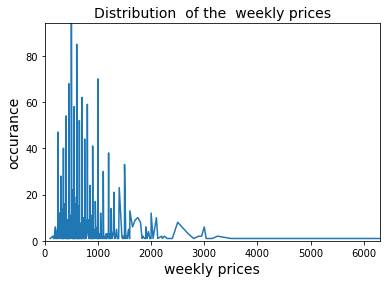

In [156]:
y = df_weekly_dist.counts

x = df_weekly_dist.weekly_price

plt.plot(x, y)
plt.axis([0, np.max(x), 0, np.max(y)])
plt.ylabel('occurance', fontsize=14)
plt.xlabel('weekly prices', fontsize=14)
plt.title('Distribution  of the  weekly prices',  fontsize=14)
plt.show()

In [152]:
df_monthly_dist = df_monthly.groupby('monthly_price',  as_index=False).count()
df_monthly_dist = change_column_name(df_monthly_dist,'counts', 'id')
df_monthly_dist.head()

,monthly_price,counts
0,500.0,2
1,520.0,1
2,550.0,1
3,588.0,1
4,600.0,4


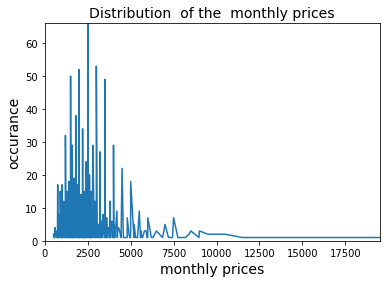

In [155]:
y = df_monthly_dist.counts

x = df_monthly_dist.monthly_price

plt.plot(x, y)
plt.axis([0, np.max(x), 0, np.max(y)])
plt.ylabel('occurance', fontsize=14)
plt.xlabel('monthly prices', fontsize=14)
plt.title('Distribution  of the  monthly prices',  fontsize=14)
plt.show()

In [38]:
column_names ='day_count'
startwith_word = 'dat'
ncolumns =3
colnames=['listing_id', 'price']
colname = 'date'

df_cal_nonzeroprices =  process_cal(df_calendar_copy,colnames, colname,ncolumns)
df_cal_nonzeroprices= change_column_name(df_cal_nonzeroprices, column_names, startwith_word)
df_cal_nonzeroprices.head()
# that price for the listing and howmany days

,listing_id,price,day_count
1,3335,120.0,309
2,4291,82.0,365
4,5682,42.0,1
5,5682,48.0,79
6,5682,49.0,2


## Analysing daily prices

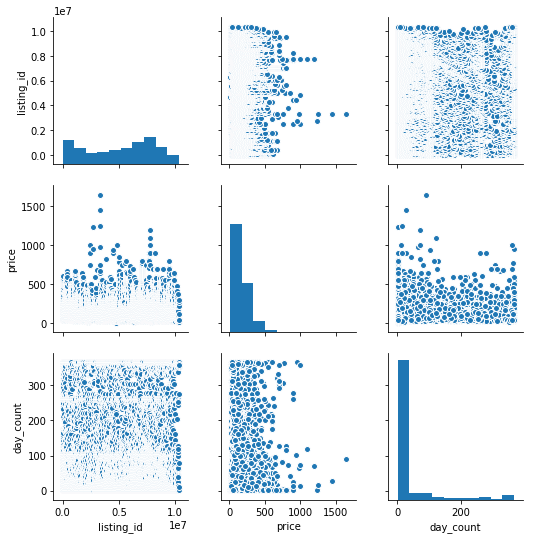

In [39]:
# plot scatter
#listing_count says how many days that listing has that price

cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.pairplot(df_cal_nonzeroprices)



In [74]:
def plot_scatter_3D(df,x,y,t,labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y, s=t, c=t, cmap='hsv')
    #df.plot.scatter(x=df[0], y=df[1], s=df[2])
    ax.set_xlabel(labels[0], fontsize=14)
    ax.set_ylabel(labels[1], fontsize=14)
    ax.set_zlabel(labels[2], fontsize=14)
    plt.title(labels[3],  fontsize=20)
    #plt.colorbar()
    plt.show()
    
    
   

In [70]:
def plot_scatter_plain(df, x,y, labels):
    '''
    INPUT: 
            df - pandas dataframe
            x  - samples
            y  - samples
            labels - figure  axis labels 
    '''
    fig, ax = plt.subplots(figsize=(15, 15))

    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
    
               
    ax.scatter(x,y) # s=t, c=t, cmap='hsv')
    

    plt.xlabel(labels[0], fontsize=14)
    plt.ylabel(labels[1], fontsize=14)
    plt.title(labels[2],  fontsize=20)
    #plt.colorbar()
    plt.show()
    

In [71]:
def plot_scatter(df, x,y,t, labels):
    '''
    INPUT: 
            df - pandas dataframe, 3 columns minimum
            x  - samples
            y  - samples
            t  - counts 
            labels - figure  axis labels 
    '''
    
    fig, ax = plt.subplots(figsize=(15, 15))

    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
    
               
    ax.scatter(x,y, s=t, c=t, cmap='hsv')
    #df.plot.scatter(x=df[0], y=df[1], s=df[2])
    plt.xlabel(labels[0], fontsize=14)
    plt.ylabel(labels[1], fontsize=14)
    plt.title(labels[2],  fontsize=20)
    #plt.colorbar()
    plt.show()
    


In [72]:
df_cal_nonzeroprices.head()

,listing_id,price,day_count
1,3335,120.0,309
2,4291,82.0,365
4,5682,42.0,1
5,5682,48.0,79
6,5682,49.0,2


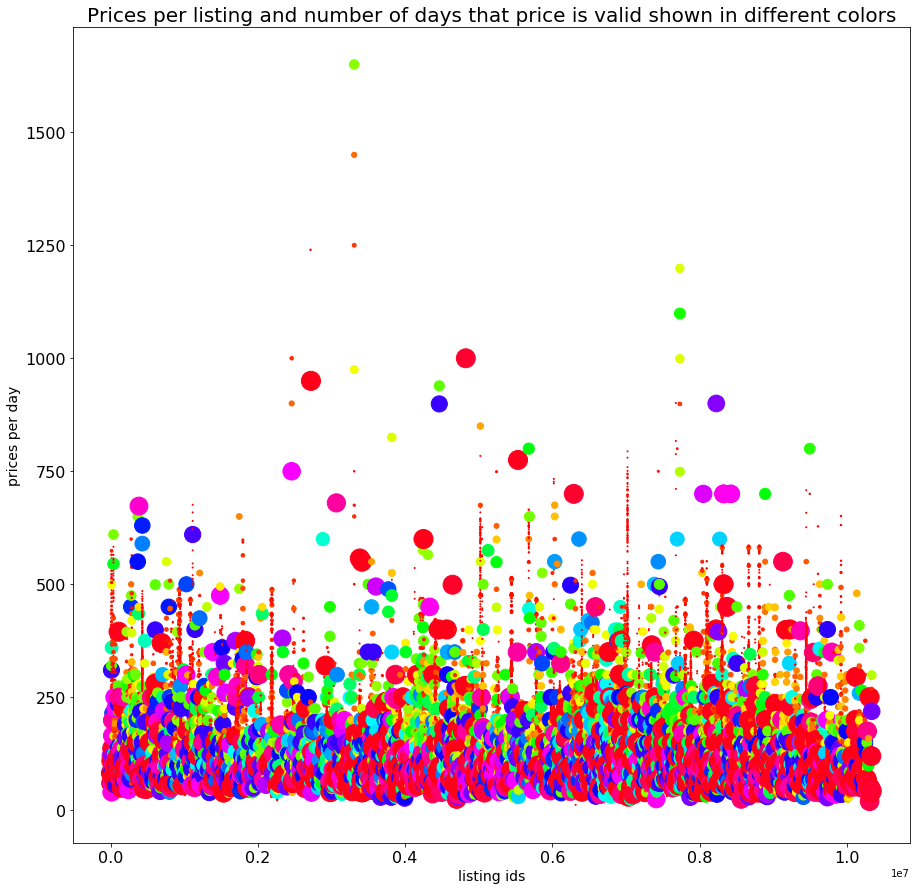

In [76]:
x = df_cal_nonzeroprices.listing_id
y = df_cal_nonzeroprices.price
t = df_cal_nonzeroprices.day_count
labels=['listing ids', 'prices per day',  'Prices per listing and number of days that price is valid shown in different colors']
#plot_scatter_3D(df_cal, x, y, t, labels)
plot_scatter(df_cal, x, y, t, labels)
# one listing id may have several daily prices, one price may apply several days

In [45]:
# process calendar for daily prices 
colnames = 'price'
colname ='listing_id'
ncolumns = 1

df_cal_dailyprices =  process_cal(df_calendar_copy, colnames, colname, ncolumns)

# change column names 
to_column_name = 'counts'
startword = 'listi'
df_cal_dailyprices = change_column_name(df_cal_dailyprices, to_column_name, startword)
df_cal_dailyprices.head(30)
# counts  how often a daily price accurs

,price,counts
1,10.0,1
2,12.0,1
3,20.0,365
4,22.0,21
5,23.0,4
6,24.0,10
7,25.0,1478
8,26.0,116
9,27.0,380
10,28.0,580


In [46]:
df_cal_dailyprices.describe()

,price,counts
count,669.000000,669.000000
mean,369.875934,1396.923767
std,229.411864,4143.280982
min,10.000000,1.000000
25%,186.000000,7.000000
50%,353.000000,111.000000
75%,525.000000,721.000000
max,1650.000000,36646.000000


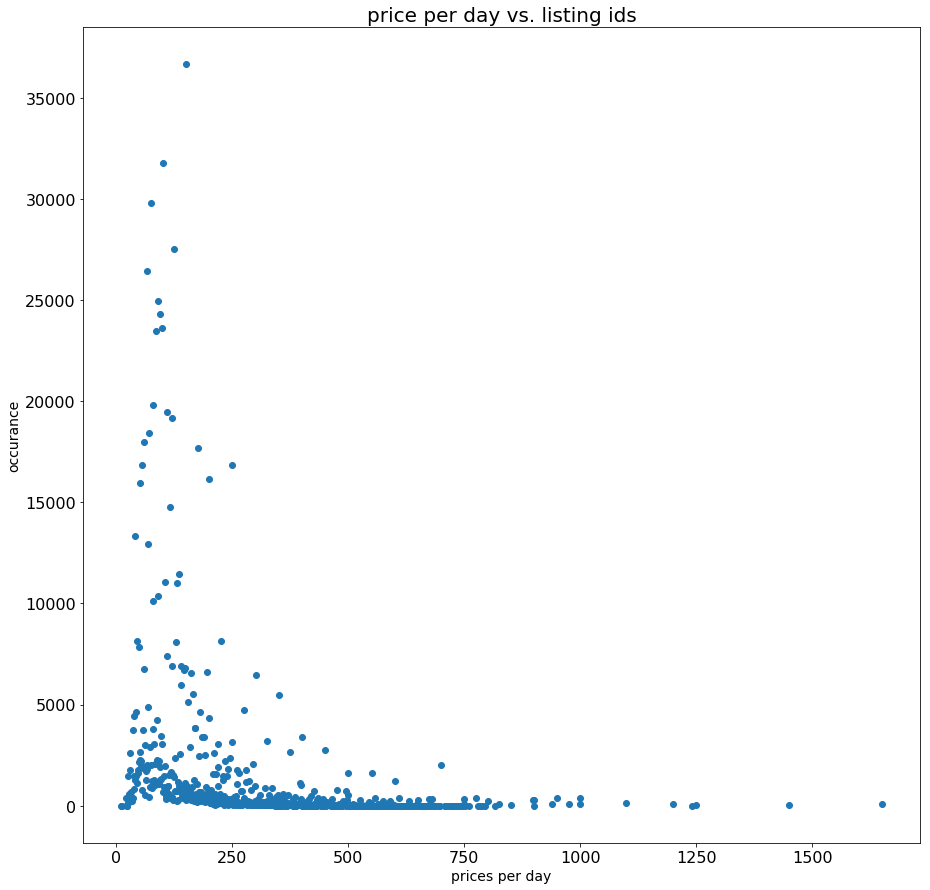

In [59]:
y =df_cal_dailyprices.counts
x = df_cal_dailyprices.price

labels=['prices per day', 'occurance', 'price per day vs. listing ids']
plot_scatter_plain(df_cal, x, y, labels)

Text(0.5,0,'price per day')

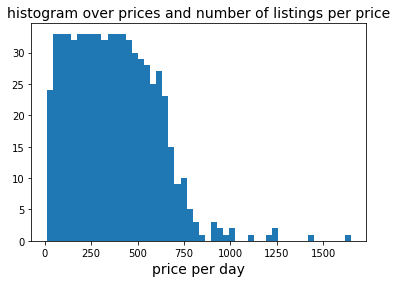

In [48]:
# Prices
counts, bins = np.histogram([df_cal_dailyprices.price], bins=50)

plt.hist(bins[:-1], bins, weights=counts)
#plt.hist([df_cal_dailyprices.price], bins=669, weights=  df_cal_dailyprices.listing_id)
plt.title('histogram over prices and number of listings per price', fontsize=14)
plt.xlabel('price per day', fontsize=14)

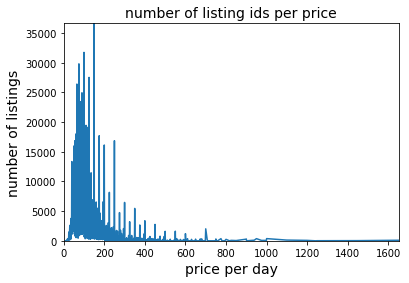

In [49]:
y = df_cal_dailyprices.counts
x = df_cal_dailyprices.price

plt.plot( df_cal_dailyprices.price, df_cal_dailyprices.counts)
plt.axis([0, np.max(df_cal_dailyprices.price), 0, np.max(df_cal_dailyprices.counts)])
plt.ylabel('number of listings', fontsize=14)
plt.xlabel('price per day', fontsize=14)
plt.title('number of listing ids per price',  fontsize=14)
plt.show()
